In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/home/agastya/miniforge3/lib/python3.10/site-packages/fastbook/__init__.py:13: UserWarning: Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`
  except ModuleNotFoundError: warn("Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`")


In [3]:
from fastai.vision.all import *

In [4]:
%%capture
!pip install duckduckgo-search nbdev

In [69]:
# Creating search function
from duckduckgo_search import ddg_images

def search_images(term, max_items = 30):
    print(f'{term} images')
    return L(ddg_images(term, max_results = max_items, color = 'Monochrome'))
                        # , size = 'large', type_image='photo'))

In [27]:
# Setting Current Notebook Directory as Path
path = Path('.').cwd()/'dataset'
path

Path('/home/agastya/notebooks/FastAI-course/self-implementation/02-mandarin-japaenese-classifier/dataset')

In [59]:
# Testing single image
from fastbook import *
test_mandarin = search_images('mandarin text', 1).itemgot('image')[0]
print(test_mandarin)
download_url(test_mandarin, path/'mandarin/test.png')

mandarin text images
https://utalk.com/news/wp-content/uploads/2020/06/GettyImages-997790960.jpg


Path('/home/agastya/notebooks/FastAI-course/self-implementation/02-mandarin-japaenese-classifier/dataset/mandarin/test.png')

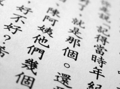

In [30]:
im = Image.open(path/'mandarin/test.png')
im.to_thumb(120)

In [70]:
# Search Images
mandarin_images = search_images('mandarin texts', 30).itemgot('image')
japanese_images = search_images('japanese texts', 30).itemgot('image')
mandarin_images

mandarin texts images
japanese texts images


(#30) ['https://1.bp.blogspot.com/-GMeObo1DqfI/Uyb8Gmf2OnI/AAAAAAAAAUY/c-OtRySzb5g/s1600/mandarin-chinese-text.jpg','https://shwestrick.github.io/assets/mandarin/pages/mandarin - page 2.png','https://shwestrick.github.io/assets/mandarin/pages/mandarin - page 24.png','https://static.turbosquid.com/Preview/2017/10/22__16_57_41/Mandarin1set.jpg7585E747-A8CB-42C6-949E-5B74506EE1BCLarge.jpg','https://www.omniglot.com/images/langsamples/udhr_chinese_zhuyin.gif','https://i.pinimg.com/originals/83/46/32/834632fba80ab27041f3dbaf8b187bce.png','https://media.fontsgeek.com/generated/m/a/mandarin-regular-charmap.png','https://shwestrick.github.io/assets/mandarin/summary/mandarin summary - page 1.png','https://oppidanlibrary.com/wp-content/uploads/2017/04/Mandarin-Letters-Pattern.gif','https://shwestrick.github.io/assets/mandarin/pages/mandarin - page 6.png'...]

In [88]:
# Download and refresh images
import shutil
if path.exists():
    shutil.rmtree(path)

path.mkdir()
download_images(path/'mandarin', urls = mandarin_images)
download_images(path/'japanese', urls = japanese_images)

In [89]:
# Clean up any other file type which were downloaded
def delete_otherImage_formats(folder_name:str):
    files = [f for f in os.listdir(path/folder_name)]
    for f in files:
        if f.endswith(('jpg', 'png', 'jpeg')):
            pass
        else:
            os.remove(path/folder_name/f)

delete_otherImage_formats('mandarin')

In [90]:
print('Mandarin Images')
mandarin_files = [f for f in os.listdir(path/'mandarin')]
print(mandarin_files)

Mandarin Images
['37a92e54-a2ea-46aa-9b4c-18cde961c3ce.jpg', 'fb1e4972-9cd8-462d-a228-997128301be2.jpg', '72864df4-b3d0-49e9-a46e-087a8276ba40.png', 'd7cd2e82-b464-4752-80de-bc6ef3ffc619.png', '4ac7a575-cb9b-4984-9534-e9fb317d0150.png', 'cdbcbf7a-65e4-4bc3-bf56-07fe088f8525.jpg', '3220af18-f5a0-49d4-9d58-8b36ffc7c2e2.png', '51b80735-004b-4545-92f1-b6151dd6b037.jpg', 'db1abbee-dff6-4d81-86e5-c080f381e907.jpg', 'd6e60f1a-f7aa-42d8-8742-c773572aad8e.png', '66b7465c-685d-43d2-b5e5-6eadc9474362.jpg', 'c2f8bf7e-d6cd-469a-8422-0d642cf49663.jpg', 'eb562522-8c34-4602-8432-e9314aa6339a.png', 'cedd560b-b41f-4bdb-bce2-027ec600cbed.png', '499da566-2372-4c09-96c6-dd57aac30bc1.png', '9ee252e6-420b-4c3f-a573-c62cc6066c7a.png', '9f587e10-ebc1-4e0f-a9d2-4b20fdd305e6.jpg', 'cda80aa8-4b07-4966-a56d-3353cfad411d.jpg', 'dae94c42-6dab-4ff3-a412-ee6a892f904a.png', 'cd99d503-600c-4468-aa1d-472aeac22692.png', '51881294-aa0f-4aa6-a12d-1579f102c45e.jpg', '69f6fd41-9c06-48b1-bccb-82cf8d763d35.png', '4fbdeafe-f3eb-

In [83]:
@widgets.interact(x = (0,29))
def f(x=0):
    im = Image.open(path/'mandarin'/mandarin_files[x])
    im.to_thumb(200)

interactive(children=(IntSlider(value=0, description='x', max=29), Output()), _dom_classes=('widget-interact',…

In [ ]:
print(path/'mandarin', type(path/'mandarin'))